In [1]:
# Import library yang dibutuhkan
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
cm = sns.light_palette("green", as_cmap=True)

# warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Membuat koneksi ke database
dbfile = 'olist.db'
con = sqlite3.connect(dbfile)

In [3]:
# lihat list table
invoice = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
invoice

name
0       olist_order_customer_dataset
1                olist_order_dataset
2        olist_order_reviews_dataset
3       olist_order_payments_dataset
4          olist_order_items_dataset
5             olist_products_dataset
6              olist_sellers_dataset
7          olist_geolocation_dataset
8  product_category_name_translation

In [4]:
# Memanggil tabel yang dibutuhkan
data_customer = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
data_order = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
data_payment = pd.read_sql_query('SELECT * FROM olist_order_payments_dataset', con)
data_review = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con)
data_item = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
data_product = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
data_category_name = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)

In [5]:
# Menggabungkan tabel yang dibutuhkan
join1 = pd.merge(data_item, data_payment, how = 'left', on = 'order_id')
join2 = pd.merge(join1, data_review, how = 'left', on = 'order_id')
join3 = pd.merge(join2, data_order, how = 'left', on = 'order_id')
join4 = pd.merge(join3, data_customer, how = 'left', on = 'customer_id')
join_product_name = pd.merge(data_product, data_category_name, how = 'inner', on = 'product_category_name')
final_join = pd.merge(join4, join_product_name, how = 'left', on = 'product_id')

# Menghapus kolom yang tidak diperlukan
drop_data = final_join.drop(['customer_unique_id', 'customer_zip_code_prefix', 'order_approved_at', 'product_category_name',
                             'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                             'payment_sequential', 'payment_installments', 'review_id', 'review_comment_title',
                             'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'product_id',
                             'order_item_id', 'seller_id', 'shipping_limit_date', 'freight_value', 'product_name_lenght',
                             'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm',
                             'product_height_cm', 'product_width_cm'], axis = 1)

final_join = drop_data.drop (['index_x_x', 'index_y_x', 'index_y_y', 'index', 'index_x_y'], axis=1)
rename_data = final_join.rename(columns = {'product_category_name_english' :'product_category'},inplace=True)
data_final = pd.DataFrame(final_join)

In [6]:
# Memanggil tabel yang akan dianalisa
data_final

order_id   price payment_type  payment_value  \
0       00010242fe8c5a6d1ba2dd792cb16214   58.90  credit_card          72.19   
1       00018f77f2f0320c557190d7a144bdd3  239.90  credit_card         259.83   
2       000229ec398224ef6ca0657da4fc703e  199.00  credit_card         216.87   
3       00024acbcdf0a6daa1e931b038114c75   12.99  credit_card          25.78   
4       00042b26cf59d7ce69dfabb4e55b4fd9  199.90  credit_card         218.04   
...                                  ...     ...          ...            ...   
118305  fffc94f6ce00a00581880bf54a75a037  299.99       boleto         343.40   
118306  fffcd46ef2263f404302a634eb57f7eb  350.00       boleto         386.53   
118307  fffce4705a9662cd70adb13d4a31832d   99.90  credit_card         116.85   
118308  fffe18544ffabc95dfada21779c9644f   55.99  credit_card          64.71   
118309  fffe41c64501cc87c801fd61db3f6244   43.00  credit_card          55.79   

        review_score                       customer_id order_status  \
0                5.0  3ce436f183e68e07877b285a838db11a    delivered   
1                4.0  f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2                5.0  6489ae5e4333f3693df5ad4372dab6d3    delivered   
3                4.0  d4eb9395c8c0431ee92fce09860c5a06    delivered   
4                5.0  58dbd0b2d70206bf40e62cd34e84d795    delivered   
...              ...                               ...          ...   
118305           5.0  b51593916b4b8e0d6f66f2ae24f2673d    delivered   
118306           5.0  84c5d4fbaf120aae381fad077416eaa0    delivered   
118307           5.0  29309aa813182aaddc9b259e31b870e6    delivered   
118308           5.0  b5e6afd5a41800fdf401e0272ca74655    delivered   
118309           5.0  96d649da0cc4ff33bb408b199d4c7dcf    delivered   

       order_purchase_timestamp          customer_city customer_state  \
0           2017-09-13 08:59:02  campos dos goytacazes             RJ   
1           2017-04-26 10:53:06        santa fe do sul             SP   
2           2018-01-14 14:33:31          para de minas             MG   
3           2018-08-08 10:00:35                atibaia             SP   
4           2017-02-04 13:57:51        varzea paulista             SP   
...                         ...                    ...            ...   
118305      2018-04-23 13:57:06               sao luis             MA   
118306      2018-07-14 10:26:46               curitiba             PR   
118307      2017-10-23 17:07:56              sao paulo             SP   
118308      2017-08-14 23:02:59                vinhedo             SP   
118309      2018-06-09 17:00:18               botucatu             SP   

             product_category  
0                  cool_stuff  
1                    pet_shop  
2             furniture_decor  
3                   perfumery  
4                garden_tools  
...                       ...  
118305             housewares  
118306  computers_accessories  
118307         sports_leisure  
118308  computers_accessories  
118309         bed_bath_table  

[118310 rows x 11 columns]

# Cleaning Null

In [7]:
# Cleaning Data
data_final.describe(include="all").T
missing_nulls = data_final.isnull().sum().sort_values(ascending = False)*100/len(data_final)
missing_nulls

product_category            1.465641
review_score                0.826642
payment_type                0.002536
payment_value               0.002536
order_id                    0.000000
price                       0.000000
customer_id                 0.000000
order_status                0.000000
order_purchase_timestamp    0.000000
customer_city               0.000000
customer_state              0.000000
dtype: float64

In [8]:
# Columns contain nan
columns_with_nan = ['product_category', 'review_score',
                   'payment_type', 'payment_value']

# tipe data tiap kolom
data_final[columns_with_nan].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_category  116576 non-null  object 
 1   review_score      117332 non-null  float64
 2   payment_type      118307 non-null  object 
 3   payment_value     118307 non-null  float64
dtypes: float64(2), object(2)
memory usage: 4.5+ MB


# Visualization Data Distribustion

<AxesSubplot:xlabel='review_score', ylabel='Count'>

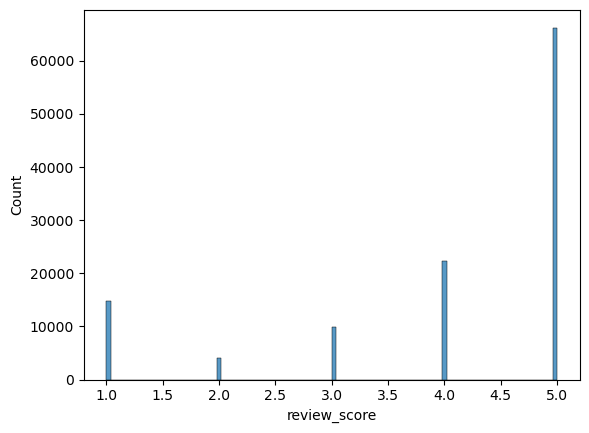

In [9]:
# histogram plot review_score
sns.histplot(data=data_final, x='review_score')

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

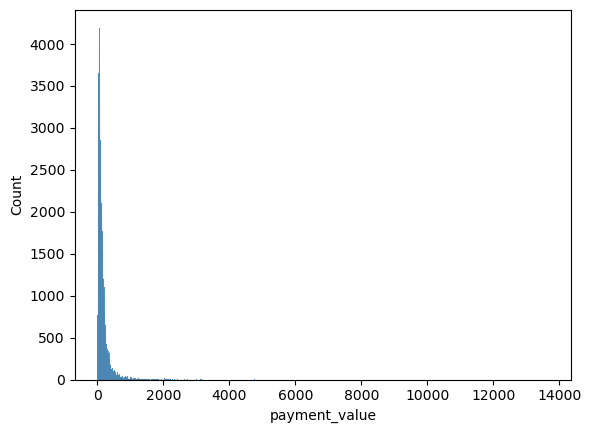

In [10]:
# histogram plot payment_value
sns.histplot(data=data_final, x='payment_value')

# Handling Missing Values & Duplicate

In [11]:
# impute review_score dan payment_value dengan median
data_final['review_score'] = data_final['review_score'].fillna(data_final['review_score'].median())
data_final['payment_value'] = data_final['payment_value'].fillna(data_final['payment_value'].median())

# impute product_category dan payment_type dengan modus
data_final['product_category'] = data_final['product_category'].fillna(data_final['product_category'].mode()[0])
data_final['payment_type'] = data_final['payment_type'].fillna(data_final['payment_type'].mode()[0])

In [12]:
# casting tipe data
data_final['price'] = data_final['price'].astype('int64')
data_final['payment_value'] = data_final['payment_value'].astype('int64')
data_final['review_score'] = data_final['review_score'].astype('int64')
data_final['order_purchase_timestamp'] = data_final['order_purchase_timestamp'].astype('datetime64[ns]')
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  118310 non-null  object        
 1   price                     118310 non-null  int64         
 2   payment_type              118310 non-null  object        
 3   payment_value             118310 non-null  int64         
 4   review_score              118310 non-null  int64         
 5   customer_id               118310 non-null  object        
 6   order_status              118310 non-null  object        
 7   order_purchase_timestamp  118310 non-null  datetime64[ns]
 8   customer_city             118310 non-null  object        
 9   customer_state            118310 non-null  object        
 10  product_category          118310 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 10.8+ MB


In [13]:
# persentase nan pada data
data_final.isnull().sum().sort_values(ascending=False)/len(data_final)*100

order_id                    0.0
price                       0.0
payment_type                0.0
payment_value               0.0
review_score                0.0
customer_id                 0.0
order_status                0.0
order_purchase_timestamp    0.0
customer_city               0.0
customer_state              0.0
product_category            0.0
dtype: float64

In [14]:
# identifikasi data duplikat
data_final[data_final.duplicated(keep=False)].head(20)

order_id  price payment_type  payment_value  \
13   0008288aa423d2a3f00fcb17cd7d8719     49       boleto            126   
14   0008288aa423d2a3f00fcb17cd7d8719     49       boleto            126   
32   00143d0f86d6fbd9f9b38ab440ac16f5     21  credit_card            109   
33   00143d0f86d6fbd9f9b38ab440ac16f5     21  credit_card            109   
34   00143d0f86d6fbd9f9b38ab440ac16f5     21  credit_card            109   
43   001ab0a7578dd66cd4b0a71f5b6e1e41     24       boleto            127   
44   001ab0a7578dd66cd4b0a71f5b6e1e41     24       boleto            127   
45   001ab0a7578dd66cd4b0a71f5b6e1e41     24       boleto            127   
49   001d8f0e34a38c37f7dba2a37d4eba8b     18  credit_card             53   
50   001d8f0e34a38c37f7dba2a37d4eba8b     18  credit_card             53   
76   002c9def9c9b951b1bec6d50753c9891     78  credit_card            173   
77   002c9def9c9b951b1bec6d50753c9891     78  credit_card            173   
89   003324c70b19a16798817b2b3640e721    102  credit_card            234   
90   003324c70b19a16798817b2b3640e721    102  credit_card            234   
93   00337fe25a3780b3424d9ad7c5a4b35e     59  credit_card            139   
94   00337fe25a3780b3424d9ad7c5a4b35e     59  credit_card            139   
97   0035246a40f520710769010f752e7507     87  credit_card             99   
98   0035246a40f520710769010f752e7507     87  credit_card             99   
104  003822434f91204da0a51fe4cf2aba18     69       boleto            175   
105  003822434f91204da0a51fe4cf2aba18     69       boleto            175   

     review_score                       customer_id order_status  \
13              5  2355af7c75e7c98b43a87b2a7f210dc5    delivered   
14              5  2355af7c75e7c98b43a87b2a7f210dc5    delivered   
32              5  2e45292979b9b2700ea09560eeb0f803    delivered   
33              5  2e45292979b9b2700ea09560eeb0f803    delivered   
34              5  2e45292979b9b2700ea09560eeb0f803    delivered   
43              4  8bb3bef4e75a95524235cdc11a7331af    delivered   
44              4  8bb3bef4e75a95524235cdc11a7331af    delivered   
45              4  8bb3bef4e75a95524235cdc11a7331af    delivered   
49              1  d987da9fb4086ab7c2c0f83963cd6722    delivered   
50              1  d987da9fb4086ab7c2c0f83963cd6722    delivered   
76              4  06cf02bf583b05fd91bc8eec0f1b4c3f    delivered   
77              4  06cf02bf583b05fd91bc8eec0f1b4c3f    delivered   
89              1  43696894b5bf8fbe1a40b2148ea505a0    delivered   
90              1  43696894b5bf8fbe1a40b2148ea505a0    delivered   
93              5  4b1b5c848616a4b5fa9d76cb1d12067b    delivered   
94              5  4b1b5c848616a4b5fa9d76cb1d12067b    delivered   
97              5  4bcf2ad7ccc061c13ff360aae5b7abcd    delivered   
98              5  4bcf2ad7ccc061c13ff360aae5b7abcd    delivered   
104             5  327679cc34d41d4c48ee5e55246aa6d6    delivered   
105             5  327679cc34d41d4c48ee5e55246aa6d6    delivered   

    order_purchase_timestamp   customer_city customer_state  \
13       2018-02-13 22:10:21         jandira             SP   
14       2018-02-13 22:10:21         jandira             SP   
32       2017-10-16 15:29:43         goiania             GO   
33       2017-10-16 15:29:43         goiania             GO   
34       2017-10-16 15:29:43         goiania             GO   
43       2017-12-27 00:38:47        salvador             BA   
44       2017-12-27 00:38:47        salvador             BA   
45       2017-12-27 00:38:47        salvador             BA   
49       2017-05-14 17:19:44       sao paulo             SP   
50       2017-05-14 17:19:44       sao paulo             SP   
76       2018-05-14 16:57:47       sao paulo             SP   
77       2018-05-14 16:57:47       sao paulo             SP   
89       2017-05-18 19:04:48      diamantina             MG   
90       2017-05-18 19:04:48      diamantina             MG   
93       2017-09-25 17:39:29       sao paulo             S

In [15]:
# menghapus data duplikat dari kolom
data_final.drop_duplicates(keep='first', inplace=True, ignore_index=True)

data_final

order_id  price payment_type  payment_value  \
0       00010242fe8c5a6d1ba2dd792cb16214     58  credit_card             72   
1       00018f77f2f0320c557190d7a144bdd3    239  credit_card            259   
2       000229ec398224ef6ca0657da4fc703e    199  credit_card            216   
3       00024acbcdf0a6daa1e931b038114c75     12  credit_card             25   
4       00042b26cf59d7ce69dfabb4e55b4fd9    199  credit_card            218   
...                                  ...    ...          ...            ...   
105192  fffc94f6ce00a00581880bf54a75a037    299       boleto            343   
105193  fffcd46ef2263f404302a634eb57f7eb    350       boleto            386   
105194  fffce4705a9662cd70adb13d4a31832d     99  credit_card            116   
105195  fffe18544ffabc95dfada21779c9644f     55  credit_card             64   
105196  fffe41c64501cc87c801fd61db3f6244     43  credit_card             55   

        review_score                       customer_id order_status  \
0                  5  3ce436f183e68e07877b285a838db11a    delivered   
1                  4  f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2                  5  6489ae5e4333f3693df5ad4372dab6d3    delivered   
3                  4  d4eb9395c8c0431ee92fce09860c5a06    delivered   
4                  5  58dbd0b2d70206bf40e62cd34e84d795    delivered   
...              ...                               ...          ...   
105192             5  b51593916b4b8e0d6f66f2ae24f2673d    delivered   
105193             5  84c5d4fbaf120aae381fad077416eaa0    delivered   
105194             5  29309aa813182aaddc9b259e31b870e6    delivered   
105195             5  b5e6afd5a41800fdf401e0272ca74655    delivered   
105196             5  96d649da0cc4ff33bb408b199d4c7dcf    delivered   

       order_purchase_timestamp          customer_city customer_state  \
0           2017-09-13 08:59:02  campos dos goytacazes             RJ   
1           2017-04-26 10:53:06        santa fe do sul             SP   
2           2018-01-14 14:33:31          para de minas             MG   
3           2018-08-08 10:00:35                atibaia             SP   
4           2017-02-04 13:57:51        varzea paulista             SP   
...                         ...                    ...            ...   
105192      2018-04-23 13:57:06               sao luis             MA   
105193      2018-07-14 10:26:46               curitiba             PR   
105194      2017-10-23 17:07:56              sao paulo             SP   
105195      2017-08-14 23:02:59                vinhedo             SP   
105196      2018-06-09 17:00:18               botucatu             SP   

             product_category  
0                  cool_stuff  
1                    pet_shop  
2             furniture_decor  
3                   perfumery  
4                garden_tools  
...                       ...  
105192             housewares  
105193  computers_accessories  
105194         sports_leisure  
105195  computers_accessories  
105196         bed_bath_table  

[105197 rows x 11 columns]

# Handling Outlier

<AxesSubplot:xlabel='review_score'>

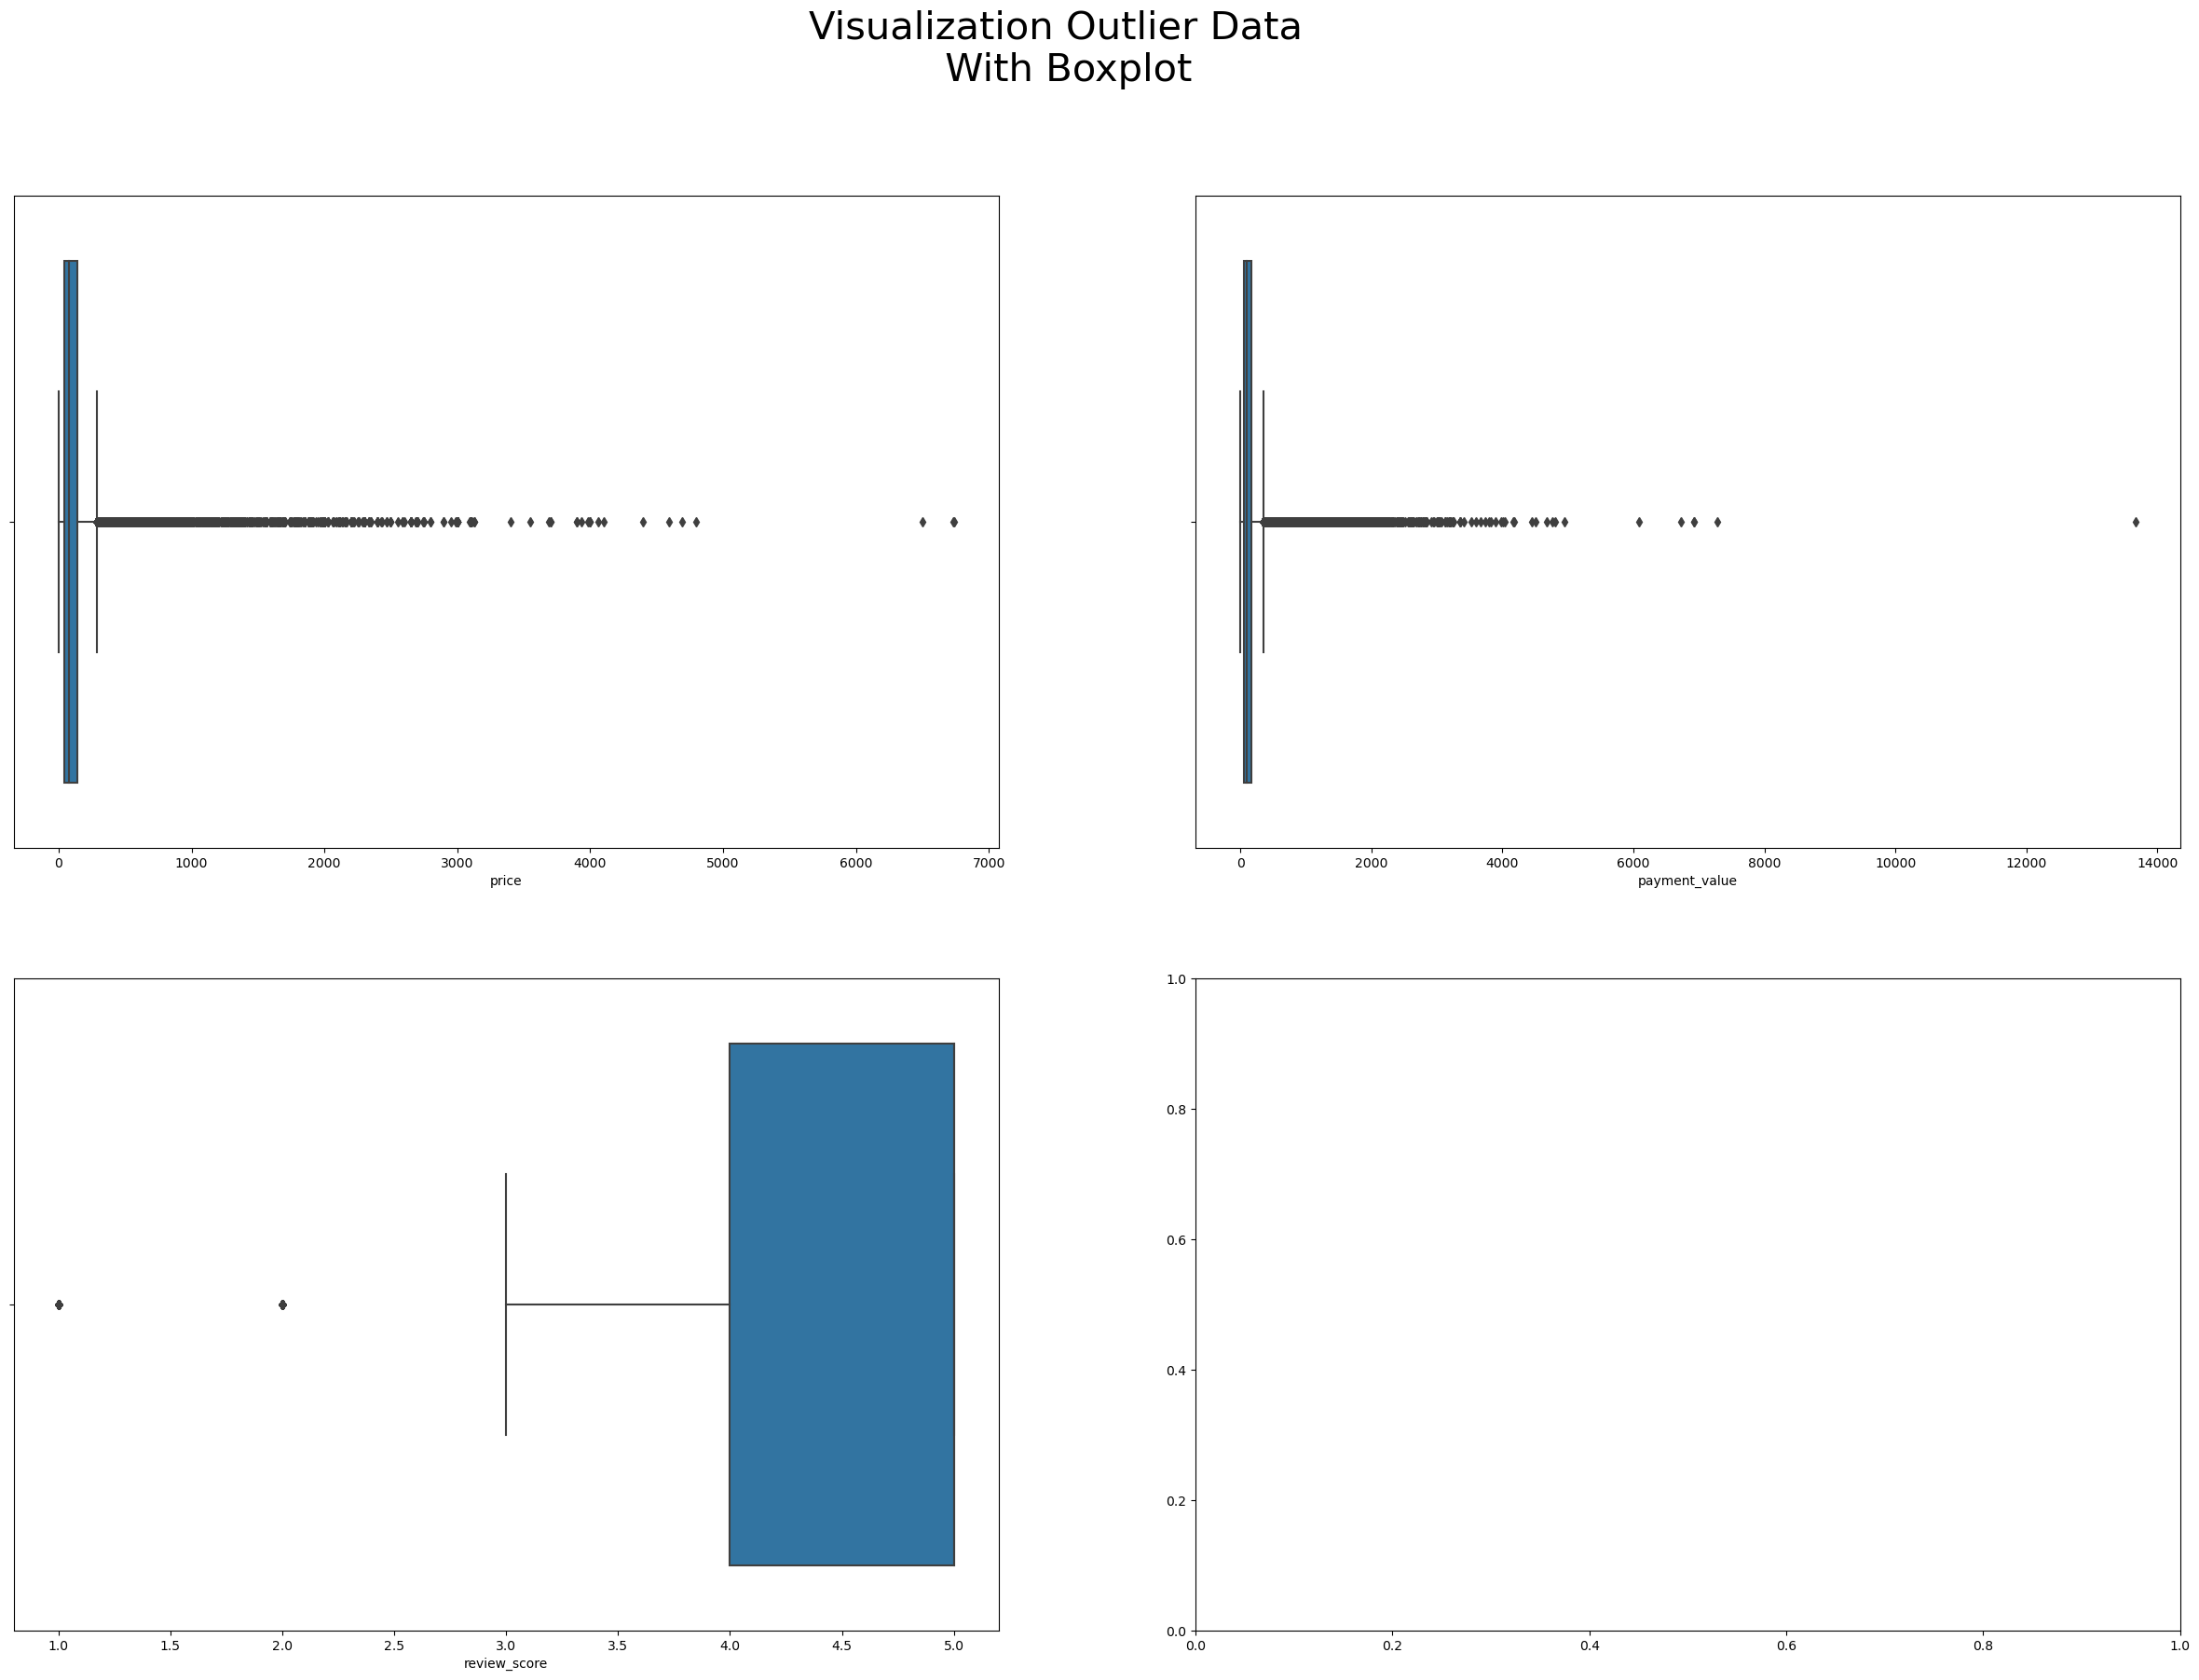

In [16]:
# handling outlier
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Visualization Outlier Data \n With Boxplot', fontsize=30)

sns.boxplot(ax=axes[0,0], data=data_final, x='price')
sns.boxplot(ax=axes[0,1], data=data_final, x='payment_value')
sns.boxplot(ax=axes[1,0], data=data_final, x='review_score')

In [17]:
# function to detect outlier using IQR
def detect_outliers_iqr(data):
    
    outliers = [] # simpan data dalam bentuk list
    data = sorted(data) # sort data values
    q1 = np.percentile(data, 25) # compute the q1
    q3 = np.percentile(data, 75) # # compute the q3
    IQR = q3 - q1 # compute the IQR
    lwr_bound = q1-(1.5*IQR) # set the lower bound
    upr_bound = q3+(1.5*IQR) # set the upper bound
    print("lower:", lwr_bound, "upper:", upr_bound)
    
    # looping columns
    for i in data:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    
    return outliers

In [18]:
# pengecekan data outlier
outlier_columns = ['price', 'payment_value', 'review_score']

for col in outlier_columns:
    outlier = detect_outliers_iqr(data_final[col])
    outlier
    print("number of outliers in column", f"'{str(col)}'", "is", len(outlier))
    print()

lower: -108.5 upper: 287.5
number of outliers in column 'price' is 7997

lower: -117.5 upper: 350.5
number of outliers in column 'payment_value' is 8183

lower: 2.5 upper: 6.5
number of outliers in column 'review_score' is 15532



In [19]:
# Delete outlier with handling capping
def capping_outlier(col):
    
    # mendefinisikan batas atas dan bawah outlier
    lwr_limit = data_final[col].quantile(0.03)
    upr_limit = data_final[col].quantile(0.97)
    
    print(str(col).upper())
    print("lwr values:", lwr_limit, "upr values:", upr_limit)
    print()
    
    # melakukan filter outlier
    data_final[col] = np.where(data_final[col]> upr_limit, upr_limit, 
                                        np.where(data_final[col]< lwr_limit, lwr_limit, data_final[col]))

In [20]:
for col in outlier_columns:
    capping_outlier(col)

PRICE
lwr values: 14.0 upr values: 519.0

PAYMENT_VALUE
lwr values: 21.0 upr values: 616.0

REVIEW_SCORE
lwr values: 1.0 upr values: 5.0



<AxesSubplot:xlabel='review_score'>

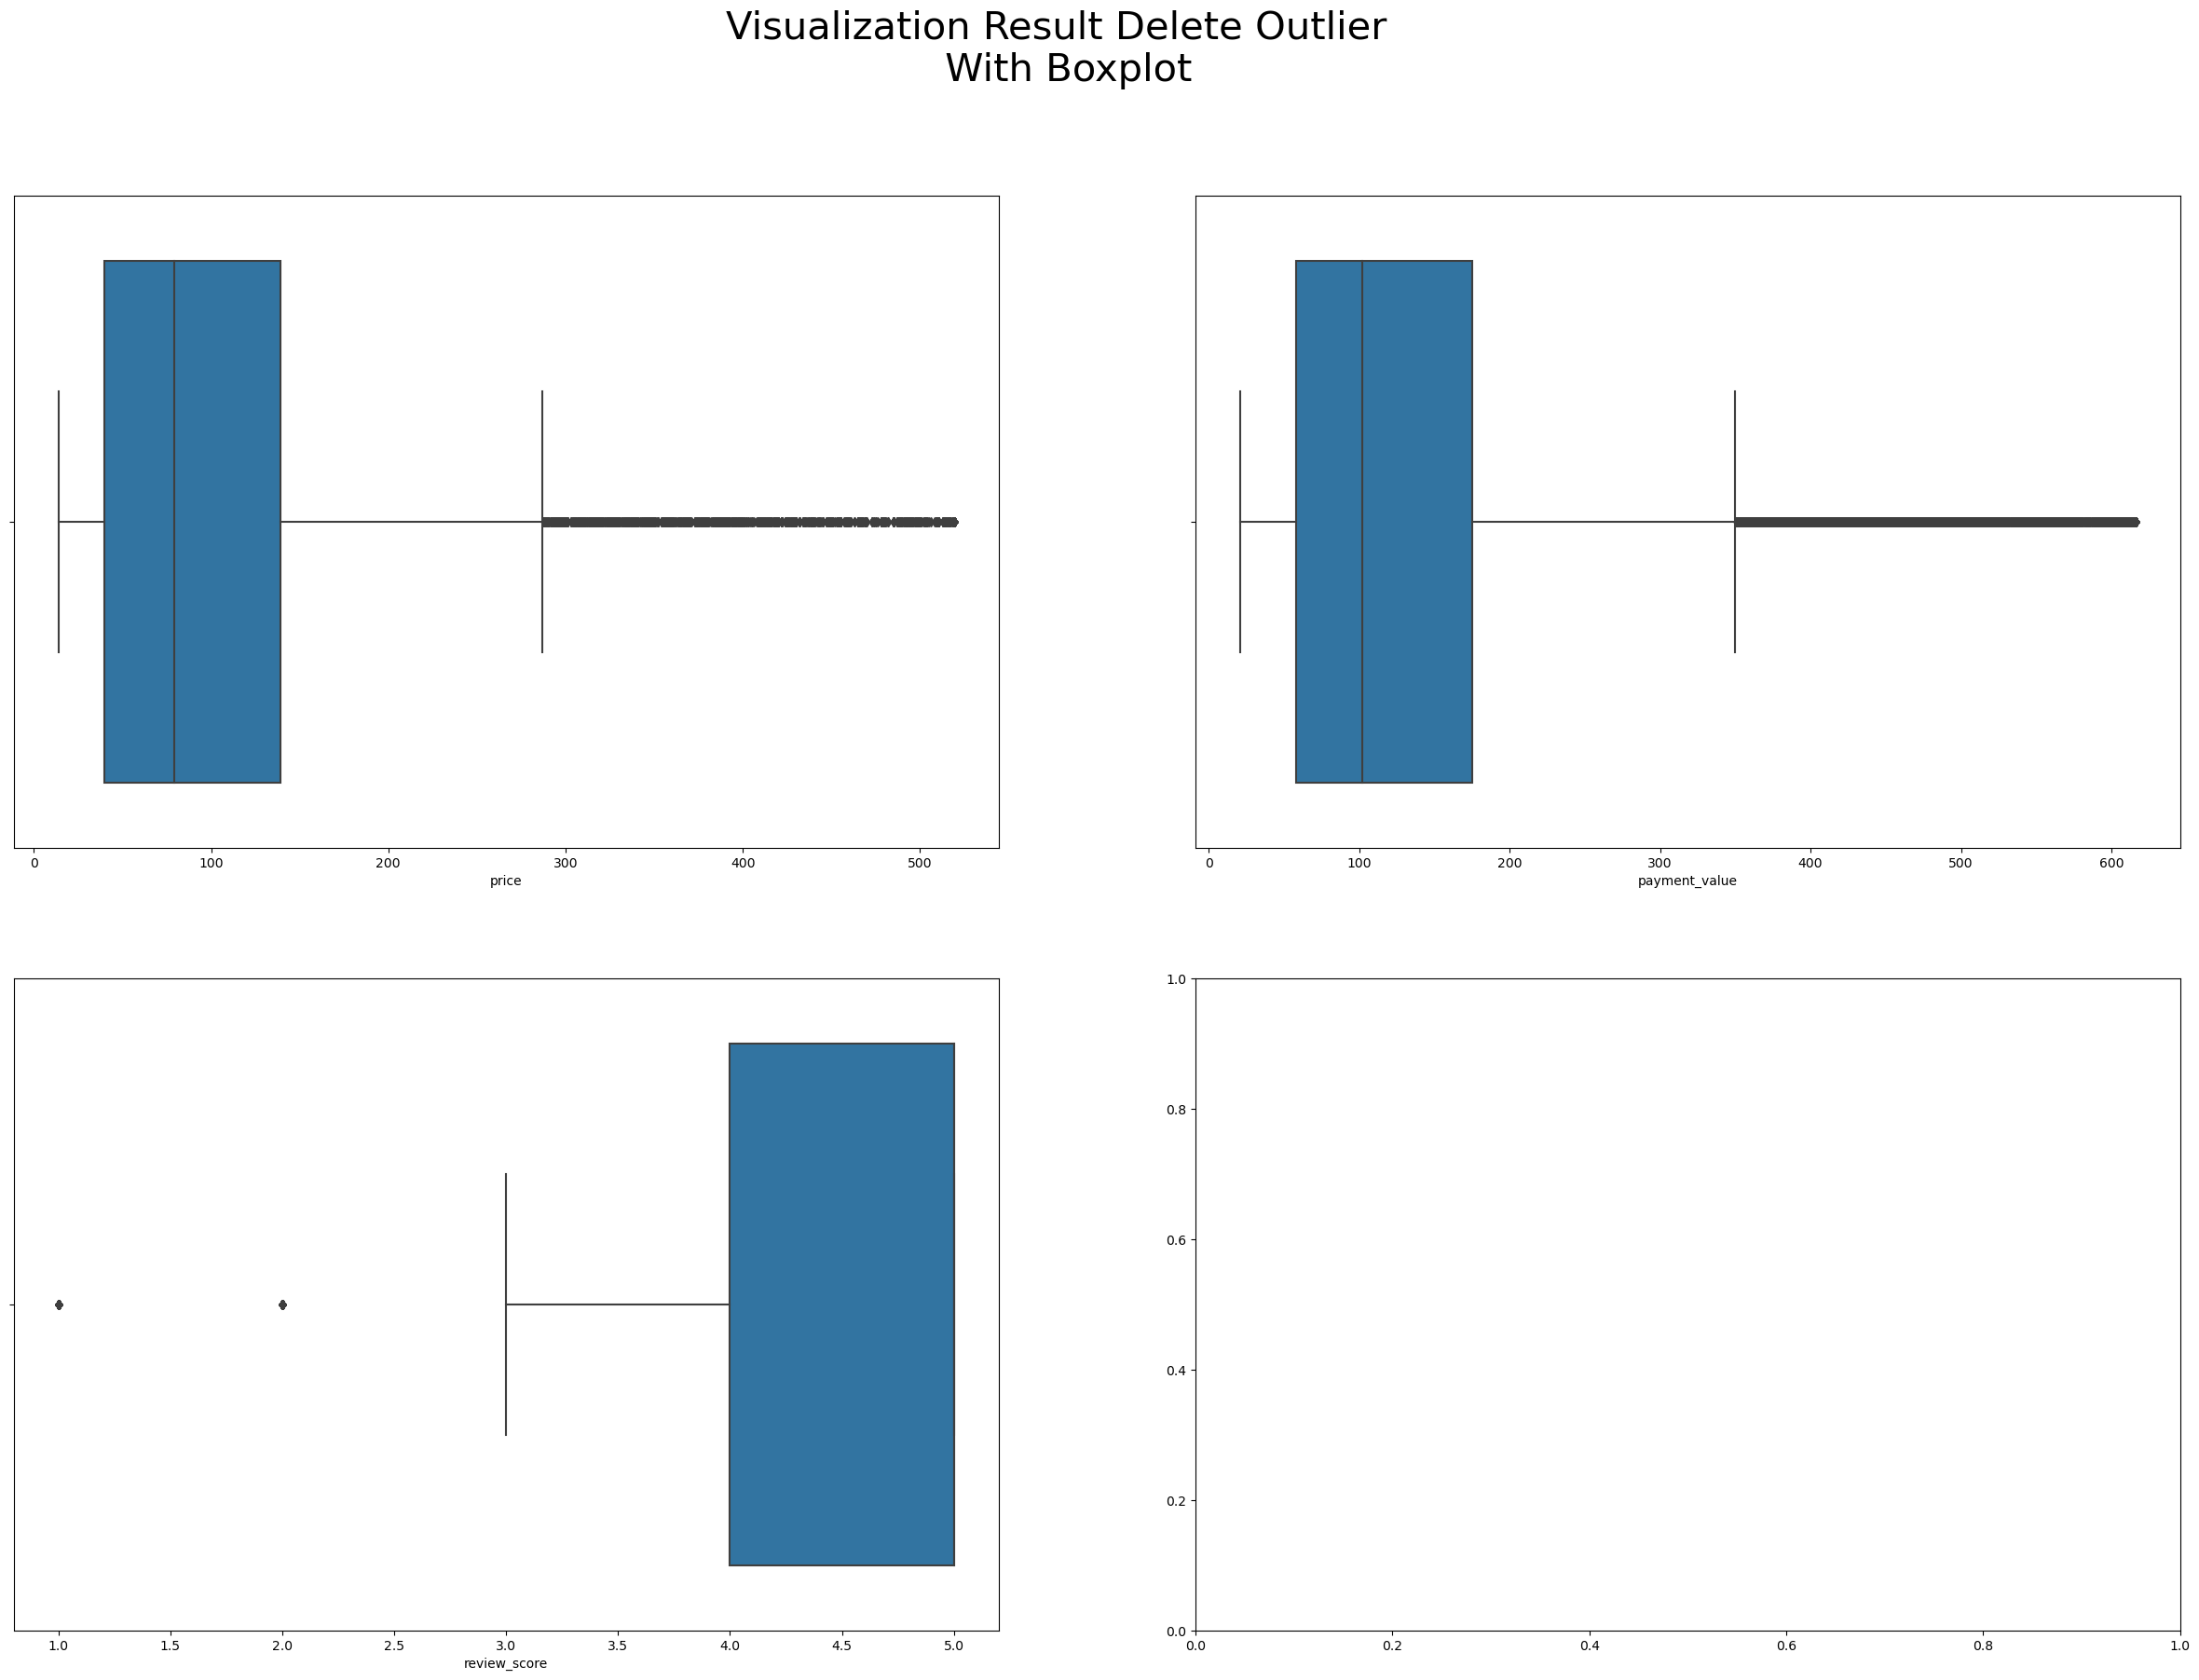

In [21]:
# pengecekan outlier sesudah dibersihkan
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Visualization Result Delete Outlier \n With Boxplot', fontsize=30)

sns.boxplot(ax=axes[0,0], data=data_final, x='price')
sns.boxplot(ax=axes[0,1], data=data_final, x='payment_value')
sns.boxplot(ax=axes[1,0], data=data_final, x='review_score')

In [22]:
# date from purchase
data_final['hour_purchase'] = data_final.order_purchase_timestamp.dt.hour # menyatakan jam
data_final['day_purchase'] = data_final.order_purchase_timestamp.dt.day # menyatakan tanggal
data_final['month_purchase'] = data_final.order_purchase_timestamp.dt.month # menyatakan bulan
data_final['year_purchase'] = data_final.order_purchase_timestamp.dt.year # menyatakan tahun
data_final['day_week_purchase'] = data_final.order_purchase_timestamp.dt.dayofweek # menyatakan hari
data_final['week_year_purchase'] = data_final.order_purchase_timestamp.dt.isocalendar().week # menyatakan minggu keberapa di tahun itu

# Change data  0 from date columns
data_final.loc[data_final['day_week_purchase'] == 0, 'day_week_purchase'] = 7

# Data Manipulation

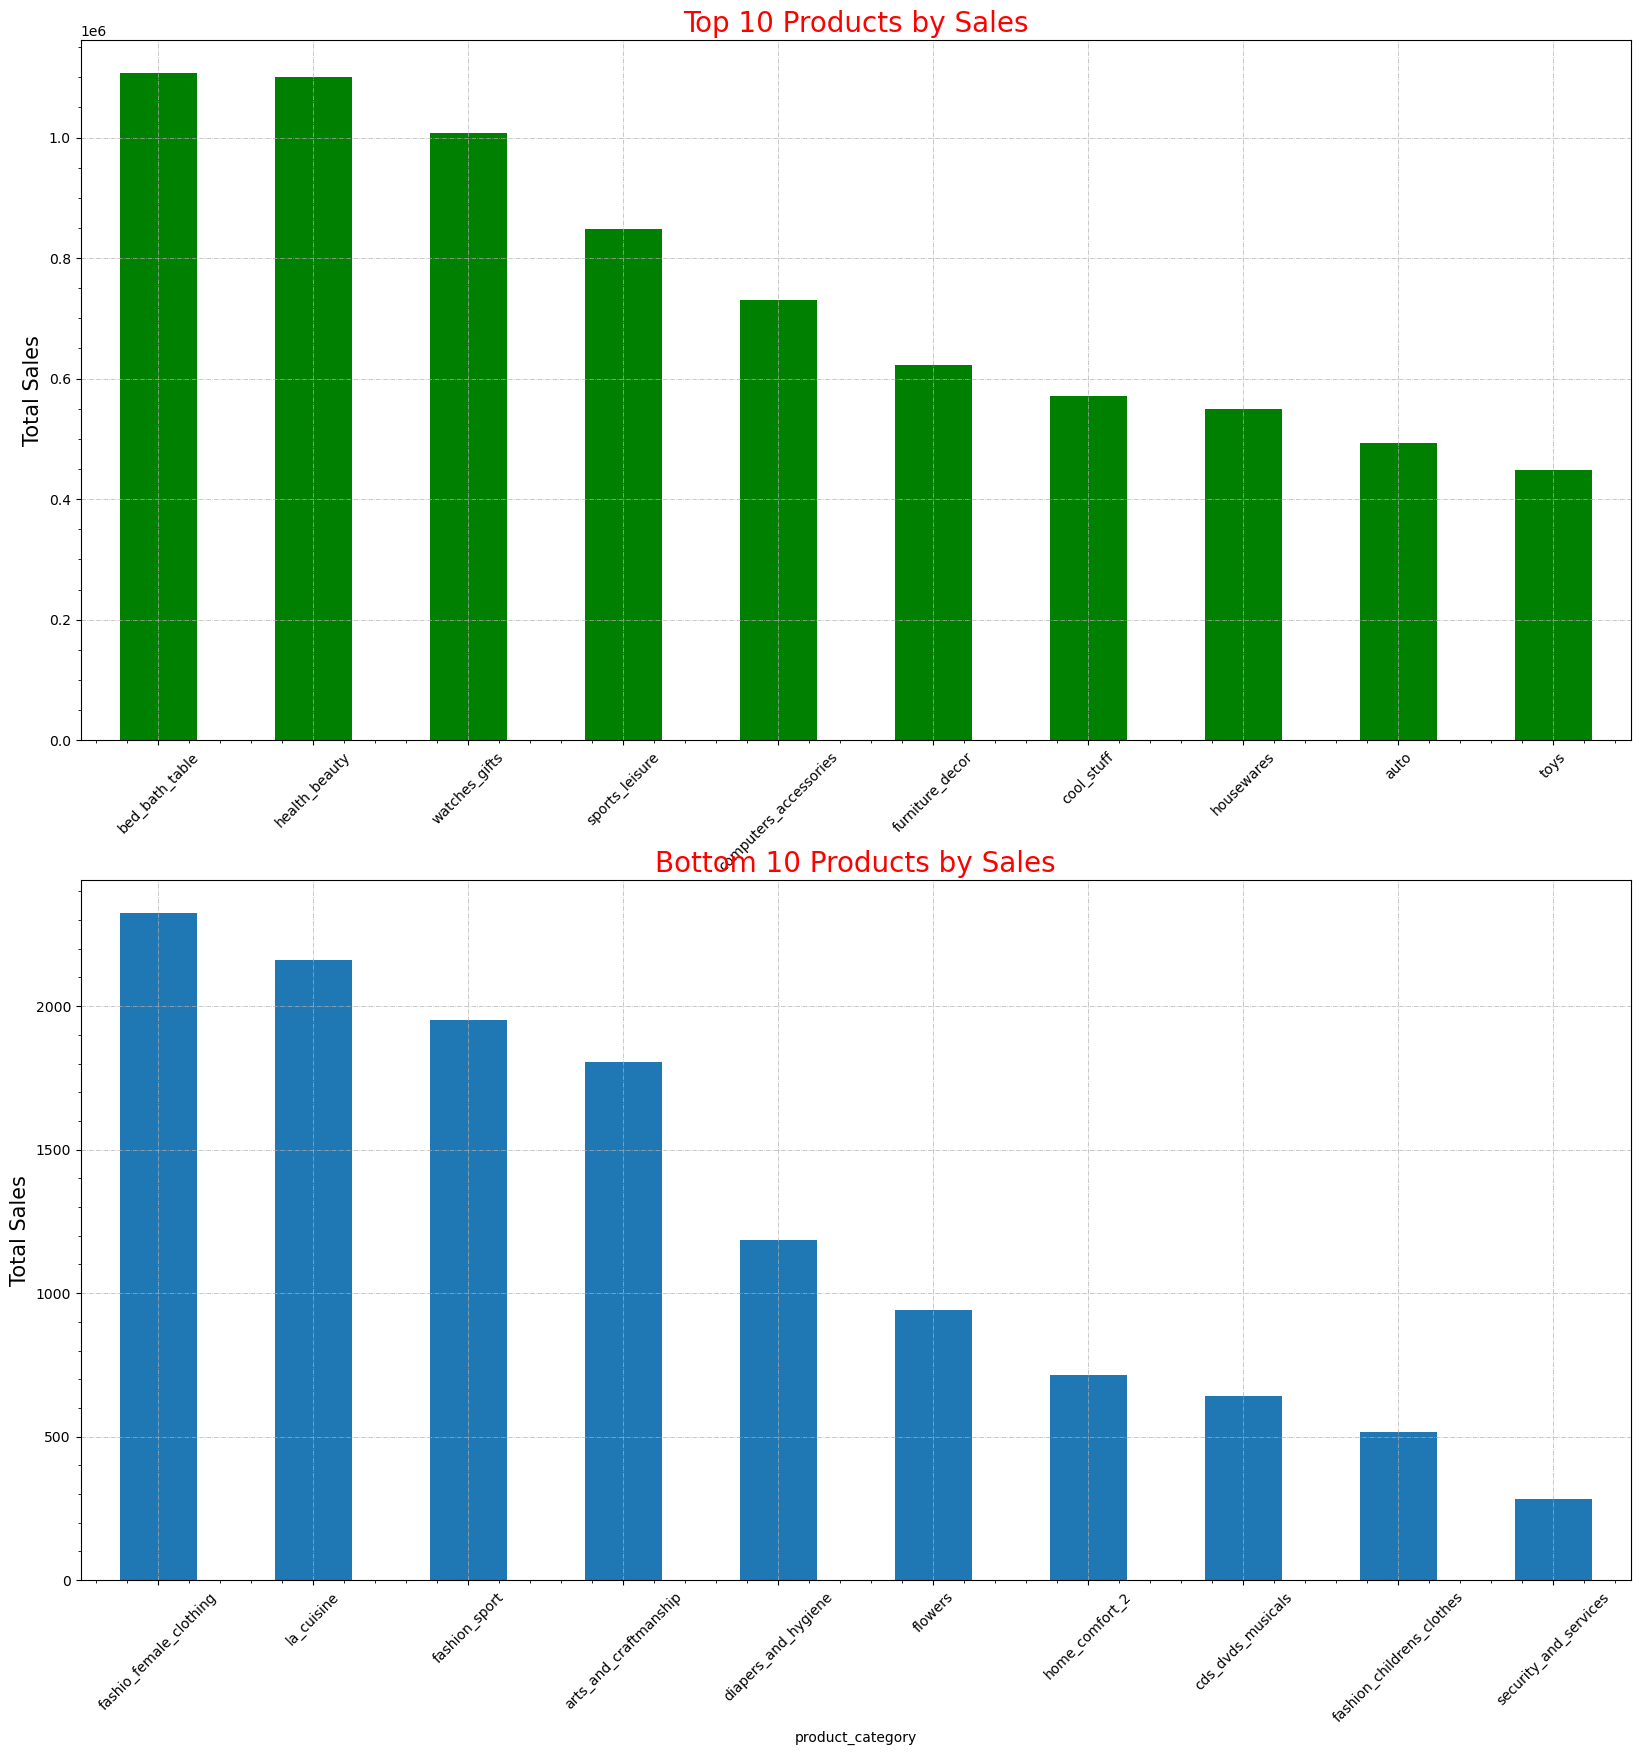

In [23]:
condition = data_final[(data_final['order_status'] == 'delivered')]

# Pembuatan grup data per kategori
top_10_sales = condition.groupby(['product_category'])['price'].sum().sort_values(ascending=False).head(10)
bottom_10_sales = condition.groupby(['product_category'])['price'].sum().sort_values(ascending=False).tail(10)


# Visualization
plt.subplot(2, 1, 1)
top_10_sales.plot(x="price", y="product_category", kind="bar", figsize=(20, 20), rot= 0, color='g')
plt.title ("Top 10 Products by Sales", size = 20, c = 'r')
plt.xticks(rotation=45)
plt.ylabel('Total Sales', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 1, 2)
bottom_10_sales.plot(x="price", y="product_category", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Bottom 10 Products by Sales", size = 20, c = 'r')
plt.xticks(rotation=45)
plt.ylabel('Total Sales', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

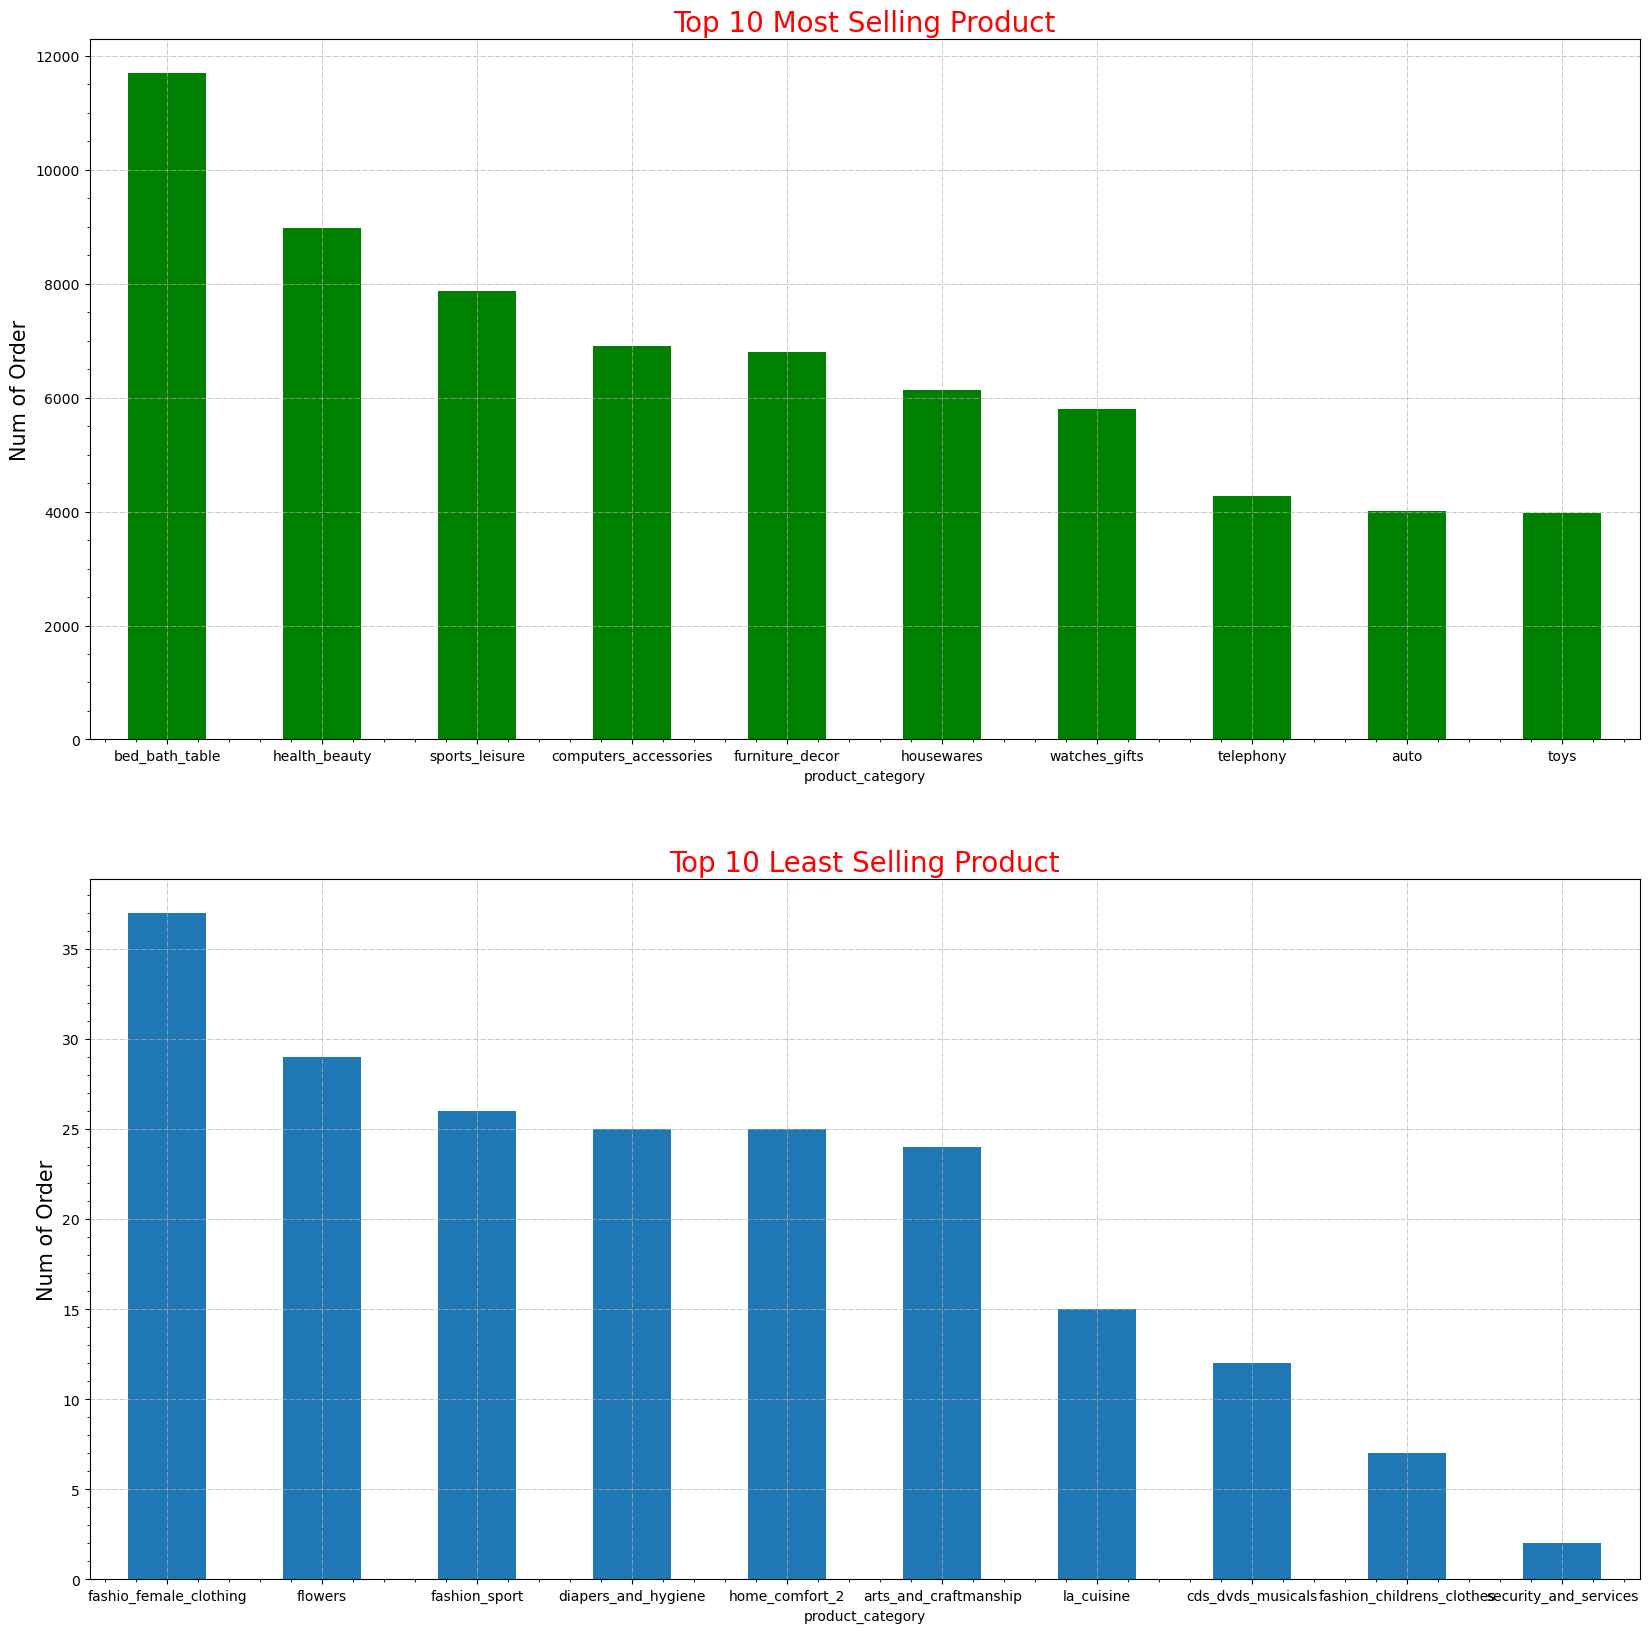

In [24]:
condition = data_final[(data_final['order_status'] == 'delivered')]

# Pembuatan grup data per kategori
top_10_product = condition.groupby(['product_category'])['price'].count().sort_values(ascending=False).head(10)
lowest_10_product = condition.groupby(['product_category'])['price'].count().sort_values(ascending=False).tail(10)

# Visualization
plt.subplot(2, 1, 1)
top_10_product.plot(x="price", y="product_category", kind="bar", figsize=(20, 20), rot= 0, color='g')
plt.title ("Top 10 Most Selling Product", size = 20, c = 'r')
plt.ylabel('Num of Order', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 1, 2)
lowest_10_product.plot(x="price", y="product_category", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Top 10 Least Selling Product", size = 20, c = 'r')
plt.ylabel('Num of Order', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

In [25]:
condition = data_final[(data_final['order_status'] == 'delivered')]

# Pembuatan pivot table per kategori
condition.pivot_table(index=['product_category'], values=['price', 'order_id'], aggfunc={'price':'sum', 'order_id':'count'}).rename(columns={"price":"sales","order_id":"num_orders"}).sort_values(["num_orders"], ascending=False).style.background_gradient(cmap=cm).set_precision(2)

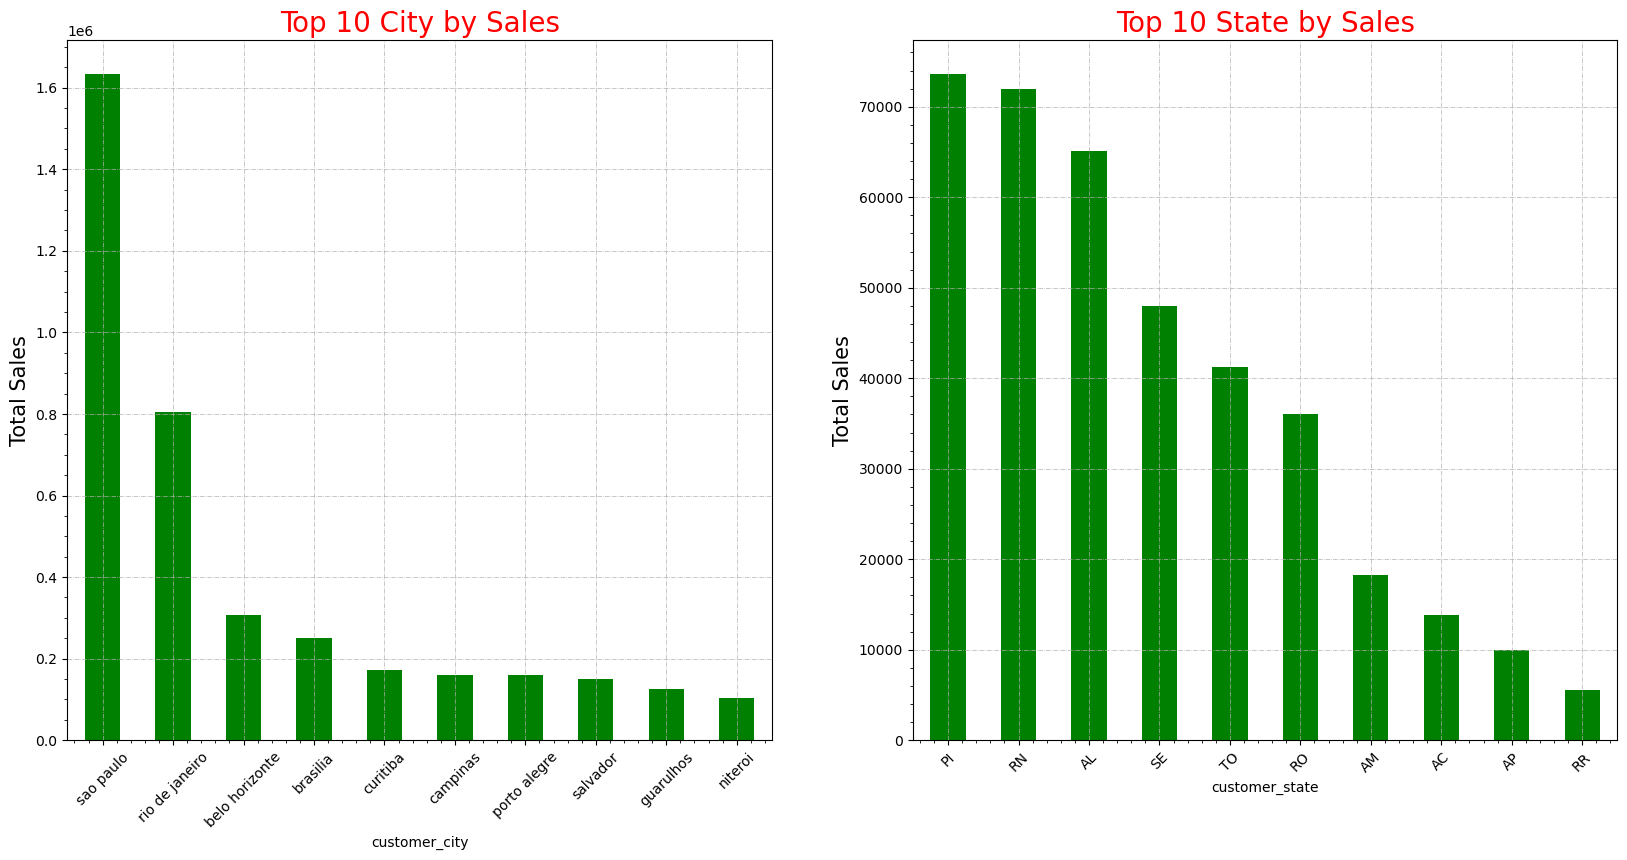

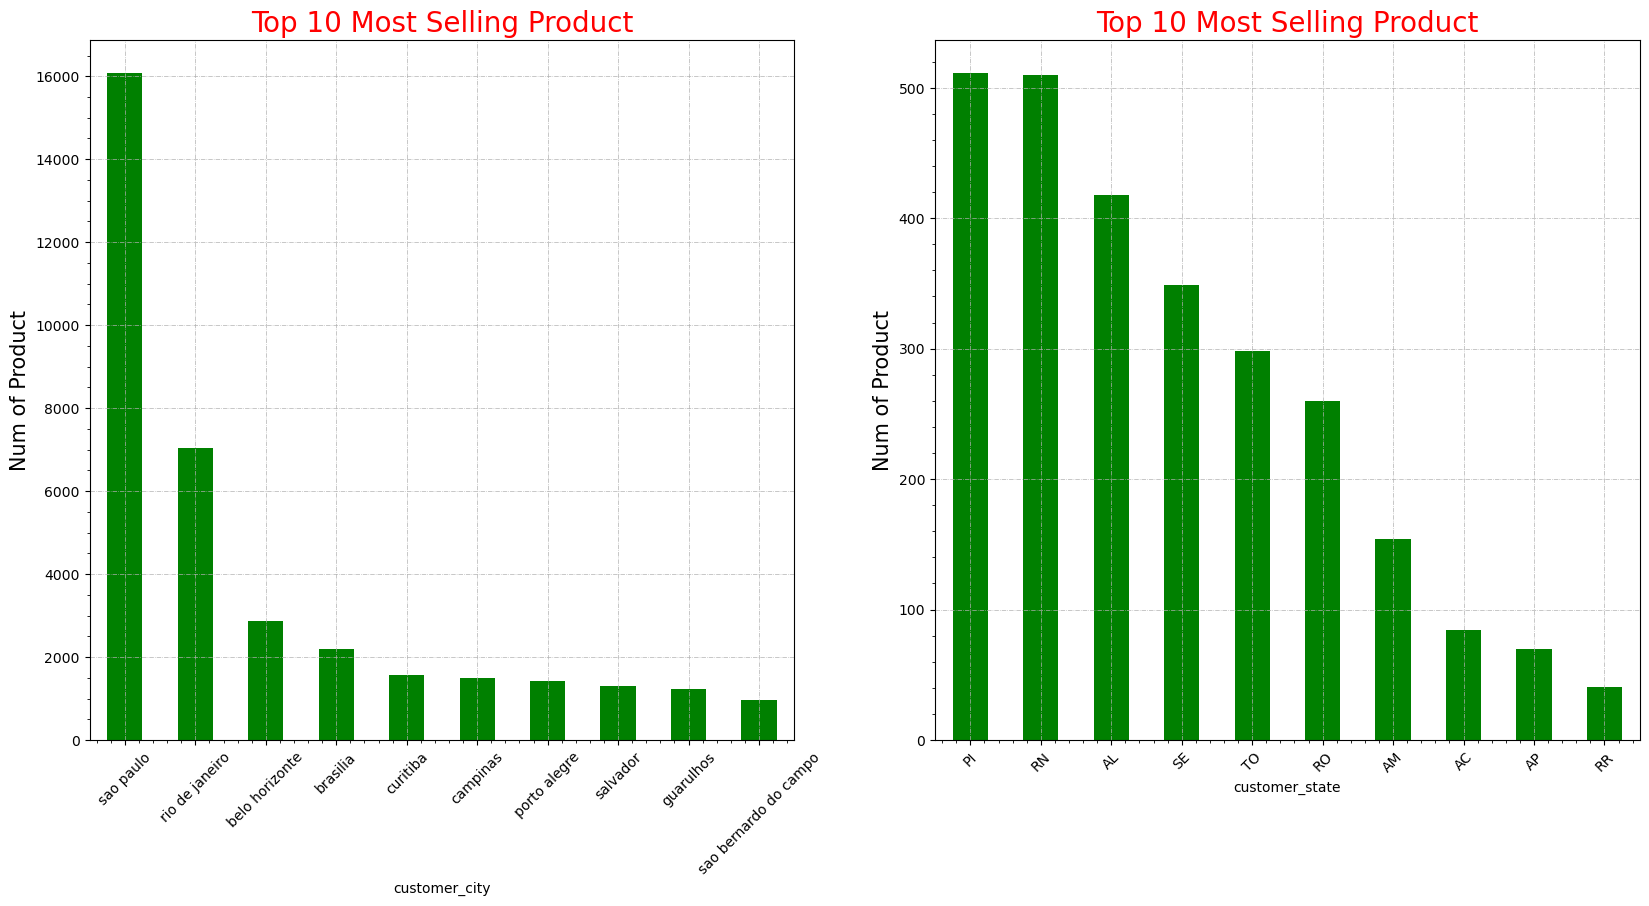

In [26]:
condition = data_final[(data_final['order_status'] == 'delivered')]

# Pembuatan grup data per kategori
sales_city = condition.groupby(['customer_city'])['price'].sum().sort_values(ascending=False).head(10)
sales_state = condition.groupby(['customer_state'])['price'].sum().sort_values(ascending=False).tail(10)

num_product_city = condition.groupby(['customer_city'])['price'].count().sort_values(ascending=False).head(10)
num_product_state = condition.groupby(['customer_state'])['price'].count().sort_values(ascending=False).tail(10)

# Visualization
plt.subplot(2, 2, 1)
sales_city.plot(x="price", y="customer_city", kind="bar", figsize=(20, 20), rot= 0, color='g')
plt.title ("Top 10 City by Sales", size = 20, c = 'r')
plt.xticks(rotation=45)
plt.ylabel('Total Sales', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
sales_state.plot(x="price", y="customer_state", kind="bar", figsize=(20, 20), rot= 0, color='g')
plt.title ("Top 10 State by Sales", size = 20, c = 'r')
plt.xticks(rotation=45)
plt.ylabel('Total Sales', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

plt.subplot(2, 2, 3)
num_product_city.plot(x="price", y="customer_city", kind="bar", figsize=(20, 20), rot= 0, color='g')
plt.title ("Top 10 Most Selling Product", size = 20, c = 'r')
plt.xticks(rotation=45)
plt.ylabel('Num of Product', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 4)
num_product_state.plot(x="price", y="customer_state", kind="bar", figsize=(20, 20), rot= 0, color='g')
plt.title ("Top 10 Most Selling Product", size = 20, c = 'r')
plt.xticks(rotation=45)
plt.ylabel('Num of Product', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

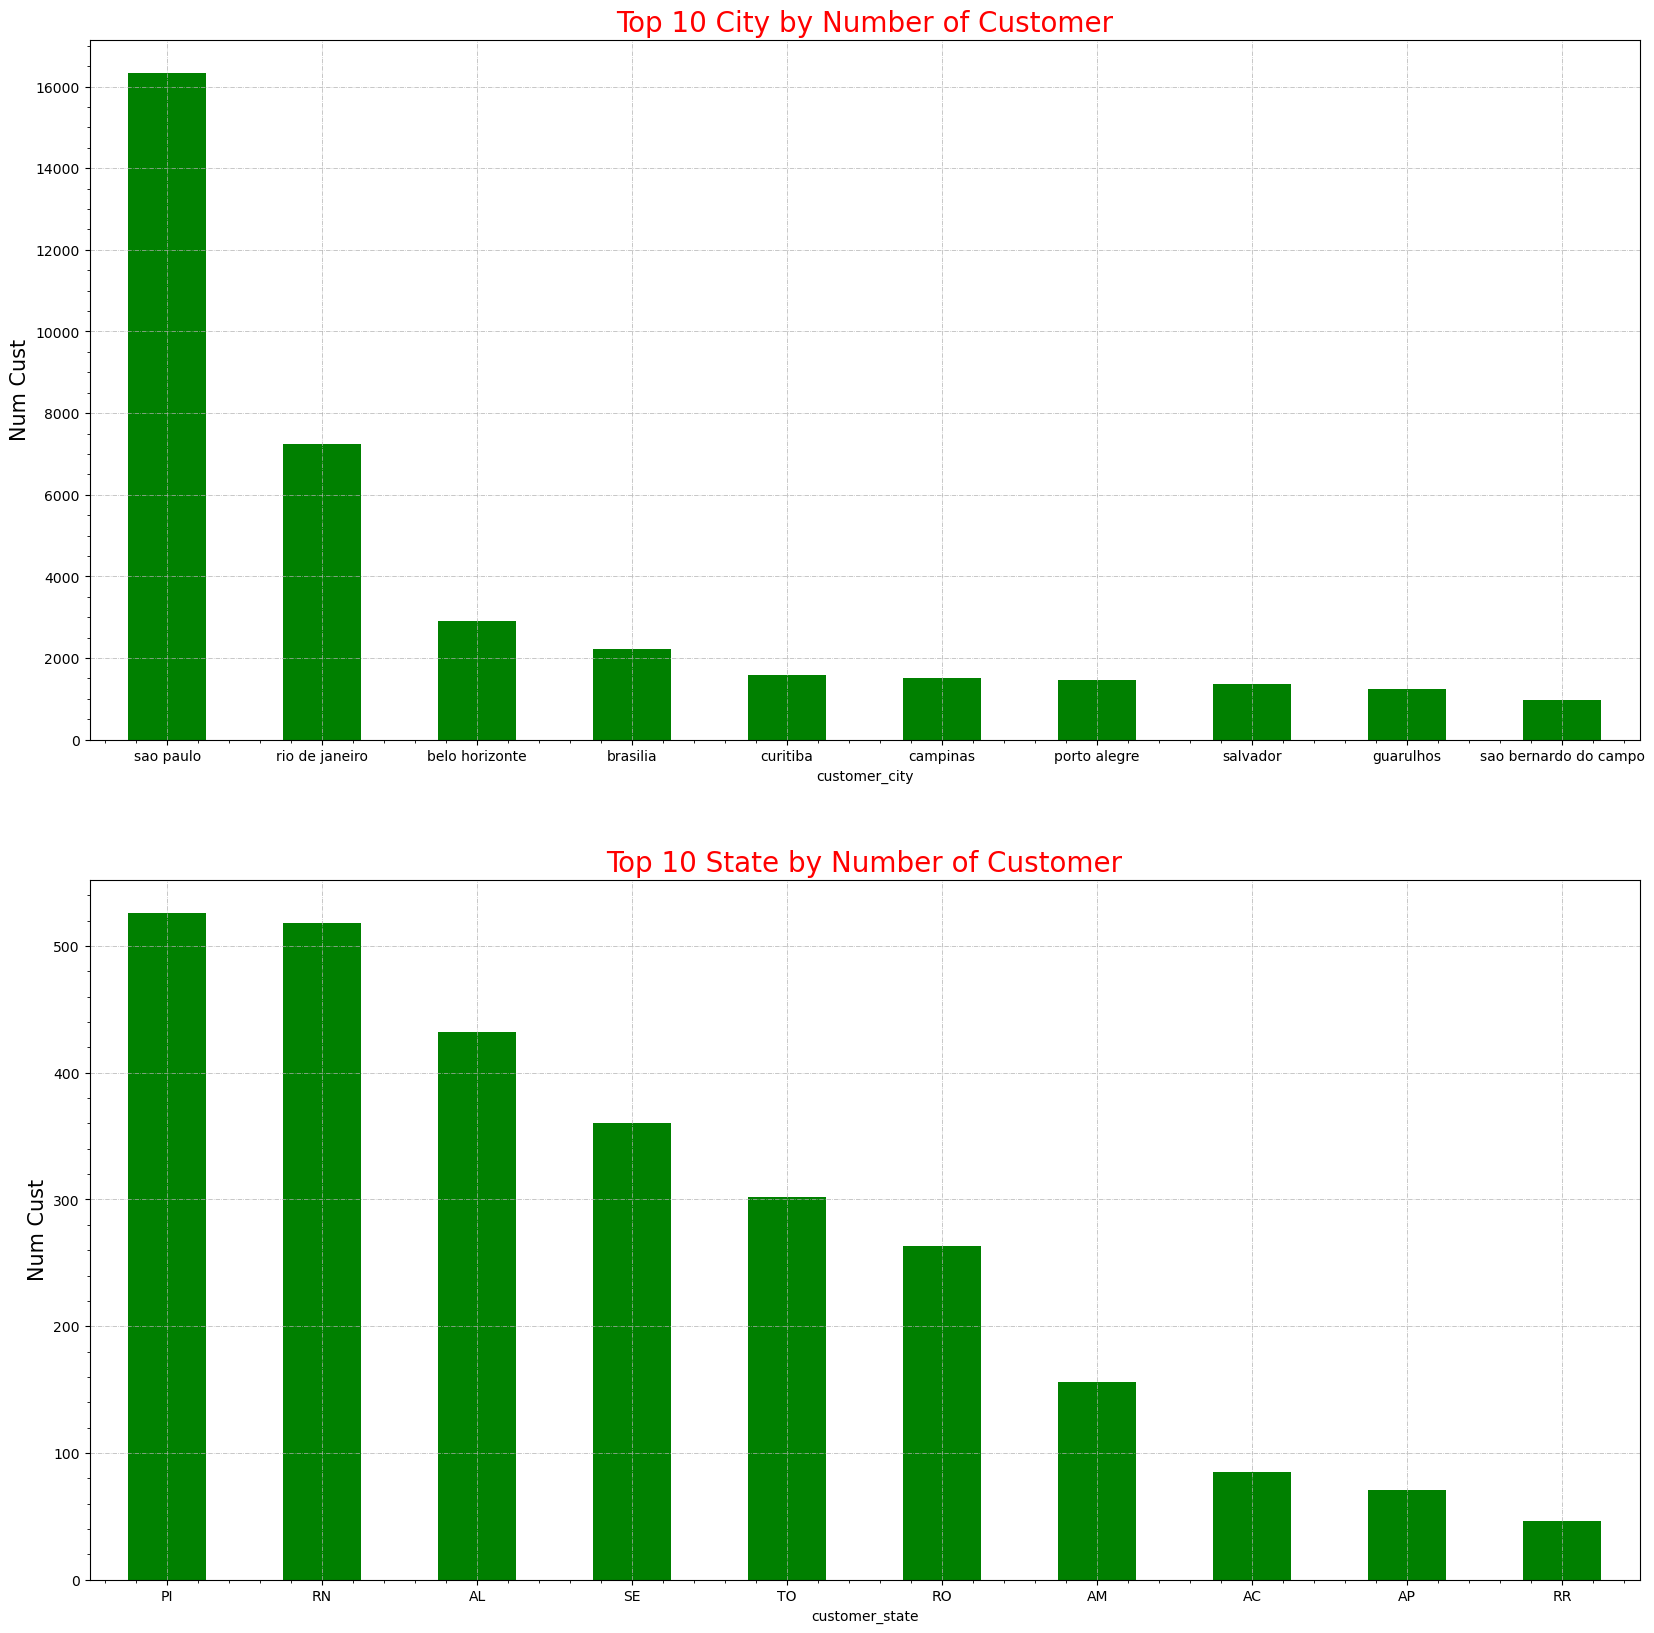

In [27]:
condition = data_final[~data_final['order_status'].isin(['canceled', 'unavailable'])]

# Pembuatan grup data per kategori
cust_city = condition.groupby(['customer_city'])['customer_id'].count().sort_values(ascending=False).head(10)
cust_state = condition.groupby(['customer_state'])['customer_id'].count().sort_values(ascending=False).tail(10)

# Visualization
plt.subplot(2, 1, 1)
cust_city.plot(x="customer_id", y="customer_city", kind="bar", figsize=(20, 20), rot= 0, color='g')
plt.title ("Top 10 City by Number of Customer", size = 20, c = 'r')
plt.ylabel('Num Cust', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 1, 2)
cust_state.plot(x="customer_id", y="customer_state", kind="bar", figsize=(20, 20), rot= 0, color='g')
plt.title ("Top 10 State by Number of Customer", size = 20, c = 'r')
plt.ylabel('Num Cust', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

In [28]:
sales_state

customer_state
PI    73664.0
RN    71992.0
AL    65135.0
SE    48027.0
TO    41214.0
RO    36052.0
AM    18215.0
AC    13838.0
AP     9963.0
RR     5554.0
Name: price, dtype: float64

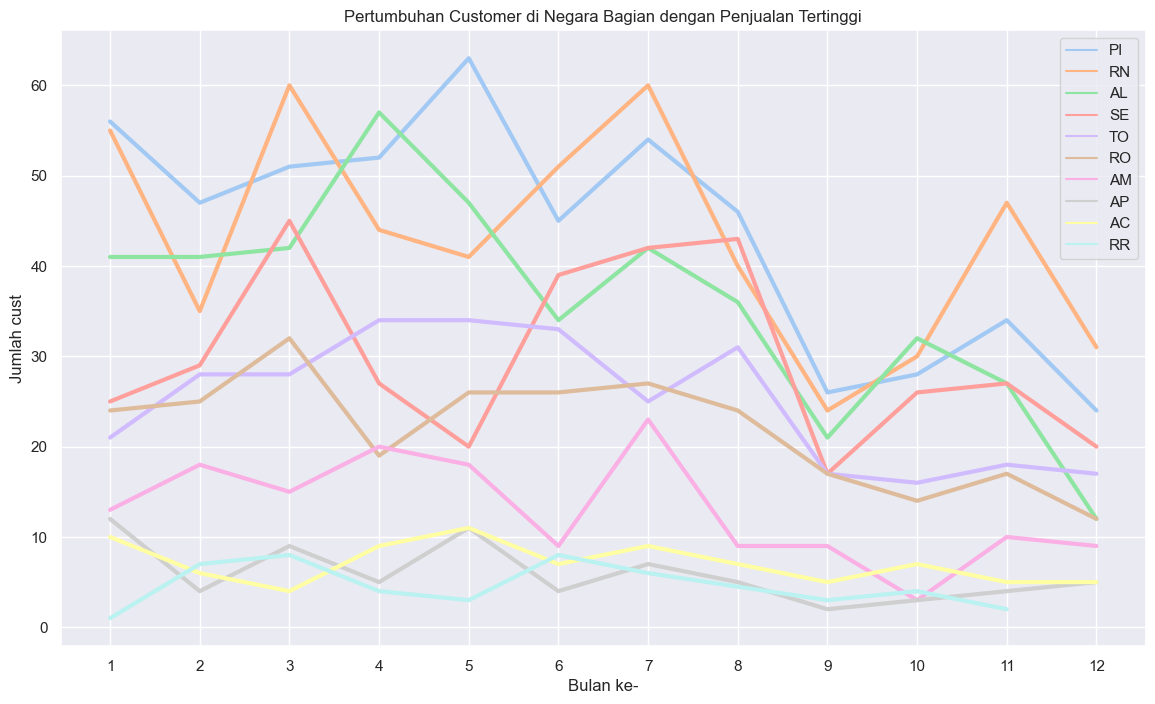

In [29]:
# memilih 10 kota dengan penjualan tertinggi
grow_cust = condition.query('customer_state in @sales_state.index')

# Tren pertumbuhan customer di kota dengan penjualan tertinggi
tren = pd.DataFrame(data = grow_cust.groupby(['month_purchase', 'customer_state'])['customer_id'].count()).sort_values(by = ['customer_id'], ascending = False)

#Visualisasi
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=tren, x ='month_purchase', y = 'customer_id',
                  hue='customer_state', palette='pastel',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Pertumbuhan Customer di Negara Bagian dengan Penjualan Tertinggi")
plt.ylabel('Jumlah cust')
plt.xlabel('Bulan ke-')
plt.show()

In [30]:
sales_city

customer_city
sao paulo         1634665.0
rio de janeiro     804226.0
belo horizonte     308089.0
brasilia           250480.0
curitiba           173355.0
campinas           159225.0
porto alegre       158877.0
salvador           151073.0
guarulhos          126698.0
niteroi            103595.0
Name: price, dtype: float64

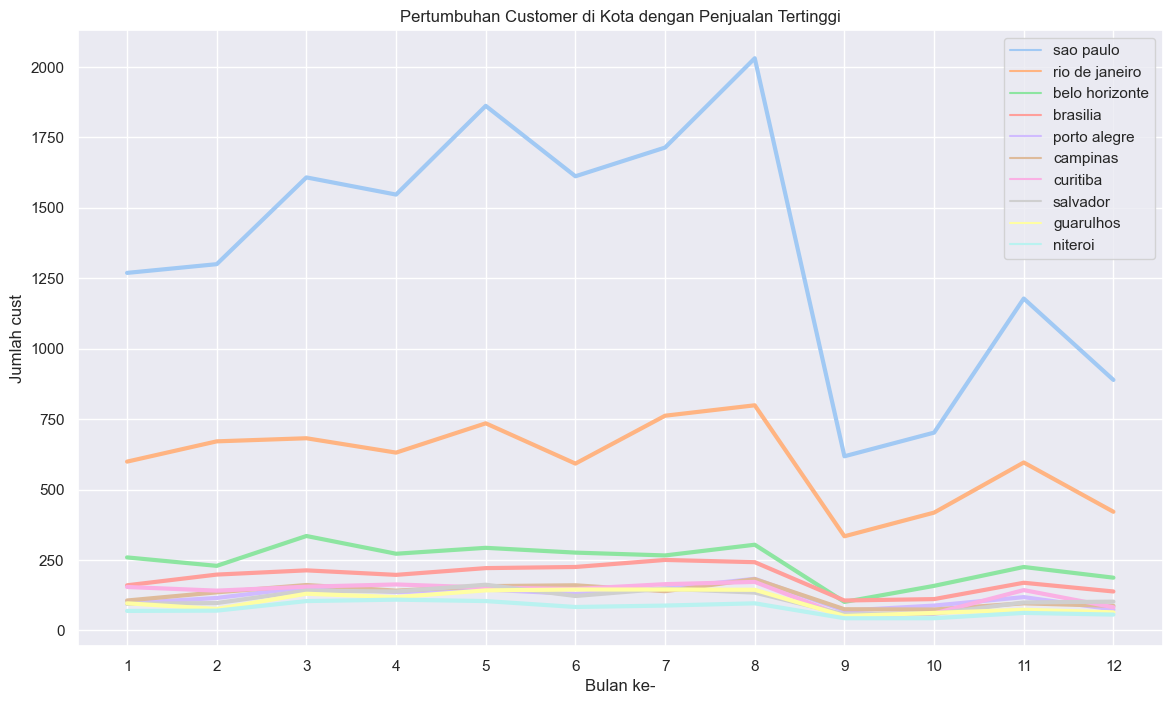

In [31]:
# memilih 10 negara bagian dengan penjualan tertinggi
grow_cust2 = condition.query('customer_city in @sales_city.index')

# Tren pertumbuhan customer di kota dengan penjualan tertinggi
tren = pd.DataFrame(data = grow_cust2.groupby(['month_purchase', 'customer_city'])['customer_id'].count()).sort_values(by = ['customer_id'], ascending = False)

#Visualisasi
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=tren, x ='month_purchase', y = 'customer_id',
                  hue='customer_city', palette='pastel',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Pertumbuhan Customer di Kota dengan Penjualan Tertinggi")
plt.ylabel('Jumlah cust')
plt.xlabel('Bulan ke-')
plt.show()

In [32]:
condition = data_final[(data_final['order_status'] == 'delivered')]

# Pembuatan pivot table per kategori
condition.pivot_table(index=['product_category'], values=['review_score', 'price', 'order_id'], aggfunc={'review_score':'mean', 'price':'sum', 'order_id':'count'}).rename(columns={"price":"sales","order_id":"num_orders"}).sort_values(["review_score"], ascending=False).style.background_gradient(cmap=cm).set_precision(2)

In [33]:
condition = data_final[~data_final['order_status'].isin(['canceled', 'unavailable'])]

# Pembuatan pivot table per kategori
condition.pivot_table(index=['customer_city'], columns=['payment_type'], values=['payment_value'], aggfunc='sum').style.background_gradient(cmap=cm).set_precision(2)

In [34]:
condition = data_final[~data_final['order_status'].isin(['canceled', 'unavailable'])]

# Pembuatan pivot table per kategori
condition.pivot_table(index=['customer_state'], columns=['payment_type'], values=['payment_value'], aggfunc='sum').style.background_gradient(cmap=cm).set_precision(2)

Text(10, 11408, 'Pembelian Tertinggi (Bulan 8)')

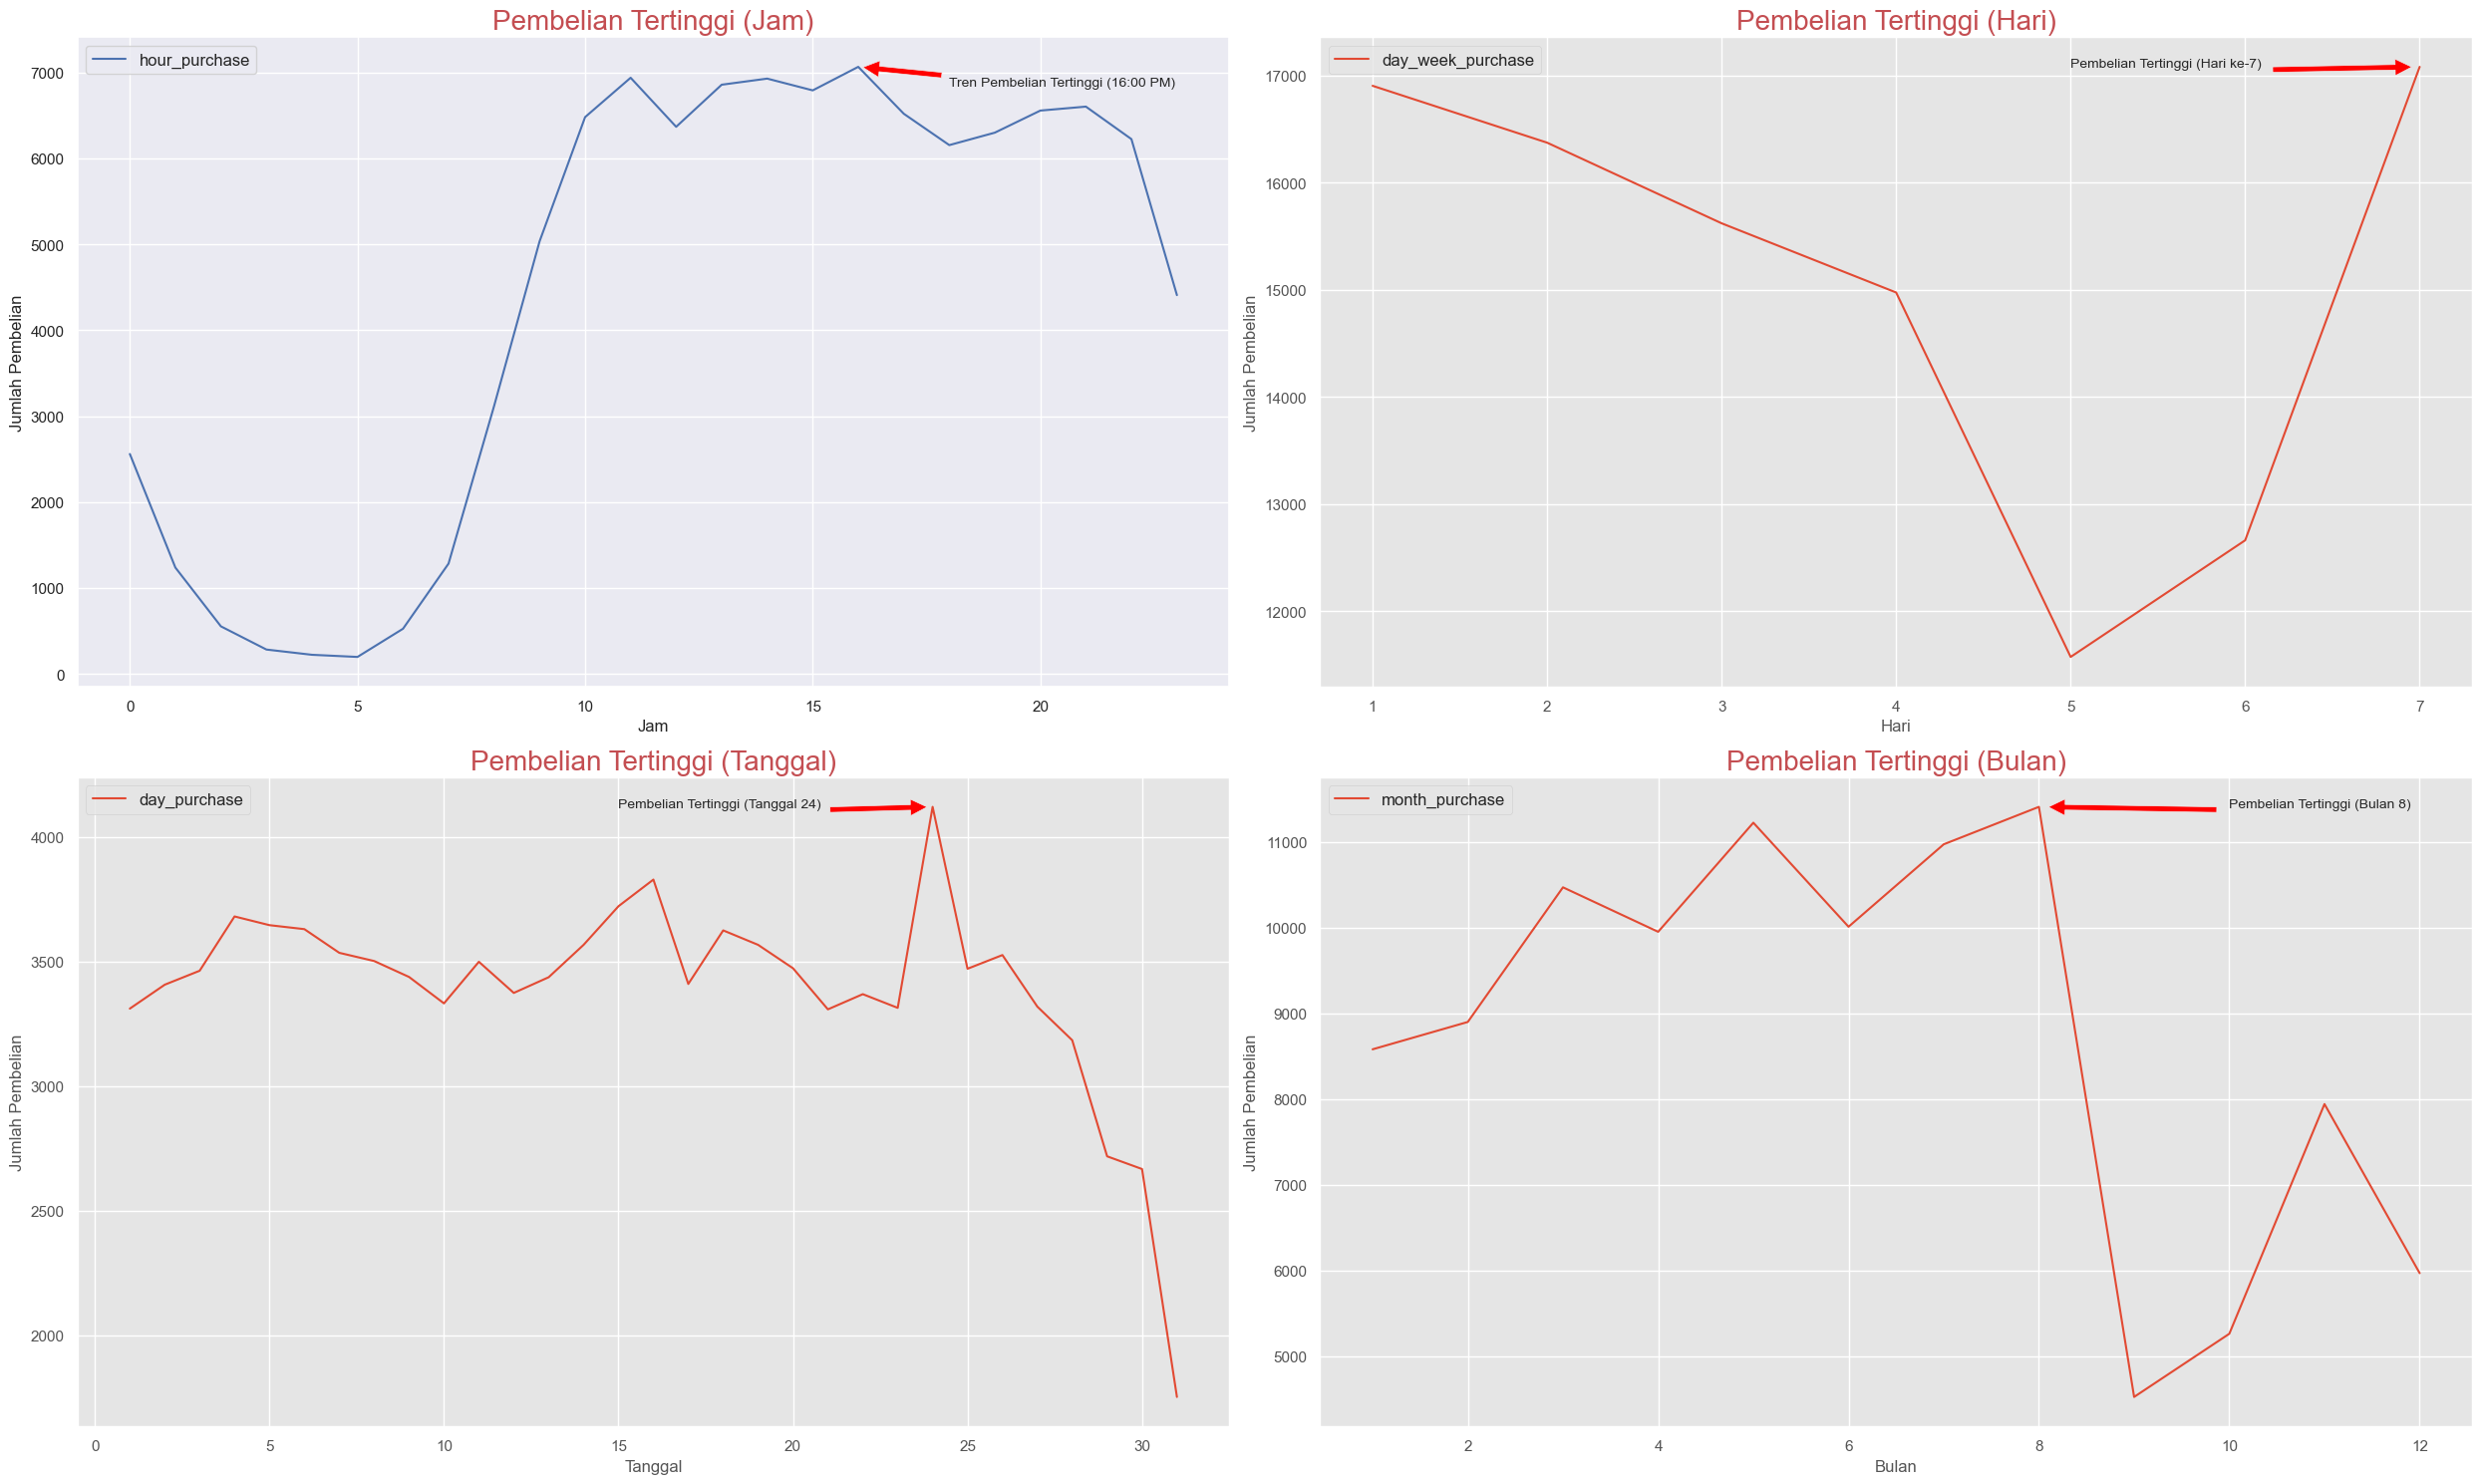

In [35]:
# Waktu paling sering terjadi pembelian
analisa_jam = data_final.groupby(['hour_purchase'])['hour_purchase'].count()
analisa_hari = data_final.groupby(['day_week_purchase'])['day_week_purchase'].count()
analisa_tanggal = data_final.groupby(['day_purchase'])['day_purchase'].count()
analisa_bulan = data_final.groupby(['month_purchase'])['month_purchase'].count()

# Visualization
plt.subplot(2, 2, 1)
ax = analisa_jam.plot(figsize=(25, 15))
ax.set_xlabel("Jam")
ax.set_ylabel("Jumlah Pembelian")
plt.title('Pembelian Tertinggi (Jam)', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('ggplot')
plt.grid(True)
plt.annotate('Tren Pembelian Tertinggi (16:00 PM)', xy=(16, 7065),xytext=(18, 6850),
             arrowprops=dict(facecolor='red', shrink=0.05),
            )

plt.subplot(2, 2, 2)
ax = analisa_hari.plot(figsize=(25, 15))
ax.set_xlabel("Hari")
ax.set_ylabel("Jumlah Pembelian")
plt.title('Pembelian Tertinggi (Hari)', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('ggplot')
plt.grid(True)
plt.annotate('Pembelian Tertinggi (Hari ke-7)', xy=(7, 17083),xytext=(5, 17083),
             arrowprops=dict(facecolor='red', shrink=0.05),
            )

plt.subplot(2, 2, 3)
ax = analisa_tanggal.plot(figsize=(25, 15))
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Pembelian")
plt.title('Pembelian Tertinggi (Tanggal)', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('ggplot')
plt.grid(True)
plt.annotate('Pembelian Tertinggi (Tanggal 24)', xy=(24, 4121),xytext=(15, 4121),
             arrowprops=dict(facecolor='red', shrink=0.05),
            )

plt.subplot(2, 2, 4)
ax = analisa_bulan.plot(figsize=(25, 15))
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Pembelian")
plt.title('Pembelian Tertinggi (Bulan)', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('ggplot')
plt.grid(True)
plt.annotate('Pembelian Tertinggi (Bulan 8)', xy=(8, 11408),xytext=(10, 11408),
             arrowprops=dict(facecolor='red', shrink=0.05),
            )